In [285]:
import numpy as np
import requests
from typing import List, Dict, Any

from stock_indicators.indicators.common.quote import Quote
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

In [286]:
class StockResponse:
    stock_data: List[Quote]

    def __init__(self, stock_data: List[Quote]):
        self.stock_data = stock_data

    @classmethod
    def from_json(cls, data: Dict[str, Any]) -> 'StockResponse':
        result = data["chart"]["result"][0]
        timestamps = result["timestamp"]
        indicators = result["indicators"]["quote"][0]

        stock_data: List[Quote] = []
        for i in range(len(timestamps)):
            date = datetime.fromtimestamp(timestamps[i])
            open_price = indicators["open"][i]
            high = indicators["high"][i]
            low = indicators["low"][i]
            close = indicators["close"][i]
            volume = indicators["volume"][i]

            # Skip if any value is None
            if 0 in (open_price, high, low, close, volume):
                continue

            stock_data.append(Quote(date, open_price, high, low, close, volume))

        return cls(stock_data=stock_data)

    def to_dataframe(self) -> pd.DataFrame:
        data = [[
            stock.date,
            stock.open,
            stock.high,
            stock.low,
            stock.close,
            stock.volume
        ] for stock in self.stock_data]
        return pd.DataFrame(data, columns=['date', 'open', 'high', 'low', 'close', 'volume'])

    def to_numpy(self) -> np.ndarray:
        data = [[
            stock.date,
            stock.open,
            stock.high,
            stock.low,
            stock.close,
            stock.volume
        ] for stock in self.stock_data]
        return np.array(data)

In [287]:
def compute_and_add_indicators(stock_data: List, df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute technical indicators and add them to the DataFrame.

    Parameters:
    - stock_data (List): List of Quote objects containing stock data.
    - df (pd.DataFrame): DataFrame containing stock data.

    Returns:
    - pd.DataFrame: Updated DataFrame with technical indicators.
    """
    # Compute Technical Indicators
    sma = indicators.get_sma(stock_data, 14)
    rsi = indicators.get_rsi(stock_data, 14)
    macd = indicators.get_macd(stock_data)
    bollinger = indicators.get_bollinger_bands(stock_data, 20)
    atr = indicators.get_atr(stock_data, 14)
    wma = indicators.get_wma(stock_data, 14)
    tr = indicators.get_tr(stock_data)
    stoch_oscillator = indicators.get_stoch(stock_data)
    william = indicators.get_williams_r(stock_data)
    ema = indicators.get_ema(stock_data, 14)
    obv = indicators.get_obv(stock_data)
    ichimoku = indicators.get_ichimoku(stock_data)
    vwap = indicators.get_vwap(stock_data)
    smi = indicators.get_smi(stock_data)
    dema = indicators.get_dema(stock_data, 14)
    mfi = indicators.get_mfi(stock_data)
    cci = indicators.get_cci(stock_data)
    cmo = indicators.get_cmo(stock_data, 14)

    # Add indicators to the DataFrame
    for i in range(len(df)):
        df.loc[i, 'SMA'] = sma[i].sma
        df.loc[i, 'RSI'] = rsi[i].rsi
        df.loc[i, 'MACD'] = macd[i].macd
        df.loc[i, 'bollinger_upper'] = bollinger[i].upper_band
        df.loc[i, 'bollinger_lower'] = bollinger[i].lower_band
        df.loc[i, 'ATR'] = atr[i].atr
        df.loc[i, 'WMA'] = wma[i].wma
        df.loc[i, 'TR'] = tr[i].tr
        df.loc[i, '%K'] = stoch_oscillator[i].k
        df.loc[i, '%D'] = stoch_oscillator[i].d
        df.loc[i, '%R'] = william[i].williams_r
        df.loc[i, 'EMA'] = ema[i].ema
        df.loc[i, 'OBV'] = obv[i].obv
        df.loc[i, 'Ichimoku'] = ichimoku[i].kijun_sen
        df.loc[i, 'VWAP'] = vwap[i].vwap
        df.loc[i, 'SMI'] = smi[i].smi
        df.loc[i, 'DEMA'] = dema[i].dema
        df.loc[i, 'MFI'] = mfi[i].mfi
        df.loc[i, 'CCI'] = cci[i].cci
        df.loc[i, 'CMO'] = cmo[i].cmo

    # Handle missing values or NaNs
    df = df.dropna()

    # Convert columns to appropriate data types
    df = df.astype({
        'close': 'float64',
        'SMA': 'float64',
        'RSI': 'float64',
        'MACD': 'float64',
        'bollinger_upper': 'float64',
        'bollinger_lower': 'float64',
        'ATR': 'float64',
        'WMA': 'float64',
        'TR': 'float64',
        '%K': 'float64',
        '%D': 'float64',
        '%R': 'float64',
        'EMA': 'float64',
        'OBV': 'float64',
        'Ichimoku': 'float64',
        'VWAP': 'float64',
        'SMI': 'float64',
        'DEMA': 'float64',
        'MFI': 'float64',
        'CCI': 'float64',
        'CMO': 'float64'
    })

    # Verify data types (optional, can be disabled to save computation)
    # print(df.dtypes)

    return df

In [288]:
from pytz import timezone
from datetime import datetime

def convert_to_unix_timestamp(date_str: str) -> int:
    jakarta_tz = timezone("Asia/Jakarta")
    current_time = datetime.now(jakarta_tz)
    date_with_time = datetime.strptime(date_str, "%Y-%m-%d").replace(
        hour=current_time.hour,
        minute=current_time.minute,
        second=current_time.second,
        tzinfo=jakarta_tz
    )
    return int(date_with_time.timestamp())


In [289]:
# Define the from and to dates
from_date = "2020-01-01"  # Input format: YYYY-MM-DD
to_date = "2024-12-31"    # Input format: YYYY-MM-DD

# Convert the dates to Unix timestamps (seconds since epoch)
period1 = convert_to_unix_timestamp(from_date)
period2 = convert_to_unix_timestamp(to_date)

# Update the Yahoo Finance URL with dynamic dates
stock_url = f"https://query2.finance.yahoo.com/v8/finance/chart/BBCA.JK?period1={period1}&period2={period2}&interval=1d"
headers = {
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

r = requests.get(stock_url, headers=headers)
r.json()

{'chart': {'result': [{'meta': {'currency': 'IDR',
     'symbol': 'BBCA.JK',
     'exchangeName': 'JKT',
     'fullExchangeName': 'Jakarta',
     'instrumentType': 'EQUITY',
     'firstTradeDate': 1086660000,
     'regularMarketTime': 1745313293,
     'hasPrePostMarketData': False,
     'gmtoffset': 25200,
     'timezone': 'WIB',
     'exchangeTimezoneName': 'Asia/Jakarta',
     'regularMarketPrice': 8500.0,
     'fiftyTwoWeekHigh': 10950.0,
     'fiftyTwoWeekLow': 7275.0,
     'regularMarketDayHigh': 8500.0,
     'regularMarketDayLow': 8325.0,
     'regularMarketVolume': 56537100,
     'longName': 'PT Bank Central Asia Tbk',
     'shortName': 'Bank Central Asia Tbk',
     'chartPreviousClose': 6685.0,
     'priceHint': 2,
     'currentTradingPeriod': {'pre': {'timezone': 'WIB',
       'end': 1745373600,
       'start': 1745373600,
       'gmtoffset': 25200},
      'regular': {'timezone': 'WIB',
       'end': 1745399700,
       'start': 1745373600,
       'gmtoffset': 25200},
      'po

# Checkpoint to restart from

In [290]:
json_data = r.json()
stock_response = StockResponse.from_json(json_data)
df   = stock_response.to_dataframe()
df

,date,open,high,low,close,volume
0,2020-01-02 09:00:00,6695.0,6780.0,6680.0,6690.0,49445000
1,2020-01-03 09:00:00,6750.0,6800.0,6725.0,6800.0,47755500
2,2020-01-06 09:00:00,6720.0,6750.0,6690.0,6735.0,27300000
3,2020-01-07 09:00:00,6735.0,6770.0,6730.0,6740.0,45022500
4,2020-01-08 09:00:00,6670.0,6745.0,6670.0,6680.0,53692500
...,...,...,...,...,...,...
1204,2024-12-20 09:00:00,9650.0,9750.0,9625.0,9650.0,91576900
1205,2024-12-23 09:00:00,9700.0,9850.0,9700.0,9775.0,43292100
1206,2024-12-24 09:00:00,9850.0,9900.0,9750.0,9750.0,32415700
1207,2024-12-27 09:00:00,9800.0,9825.0,9725.0,9800.0,24016700


In [291]:
# init variable for dataset to be used
# remove all column except for date and move the close price to y
df = stock_response.to_dataframe()
df = df.drop(columns=['open', 'high', 'low', 'volume'])

# Add column for the next day close price
df['next_day_price_move'] = df['close'].shift(-1)

# Drop the last row as it will have NaN in 'next_day_price_move'
df = df.drop(df.index[-1])

# Create the label with 3 classes
df['next_day_price_move'] = np.where(df['close'] < df['next_day_price_move'], 2,
                                     np.where(df['close'] == df['next_day_price_move'], 1, 0))

# Ensure there are no invalid labels
assert df['next_day_price_move'].isin([0, 1, 2]).all(), "Invalid label found"

df

,date,close,next_day_price_move
0,2020-01-02 09:00:00,6690.0,2
1,2020-01-03 09:00:00,6800.0,0
2,2020-01-06 09:00:00,6735.0,2
3,2020-01-07 09:00:00,6740.0,0
4,2020-01-08 09:00:00,6680.0,2
...,...,...,...
1203,2024-12-19 09:00:00,9675.0,0
1204,2024-12-20 09:00:00,9650.0,2
1205,2024-12-23 09:00:00,9775.0,0
1206,2024-12-24 09:00:00,9750.0,2


# Define the Technical Indicators

In [292]:
from stock_indicators import indicators
stock_data = stock_response.stock_data # Holds the data in Quote object to be used for indicators
df = compute_and_add_indicators(stock_data, df)

print(df.dtypes)
df

date                   datetime64[ns]
close                         float64
next_day_price_move             int32
SMA                           float64
RSI                           float64
MACD                          float64
bollinger_upper               float64
bollinger_lower               float64
ATR                           float64
WMA                           float64
TR                            float64
%K                            float64
%D                            float64
%R                            float64
EMA                           float64
OBV                           float64
Ichimoku                      float64
VWAP                          float64
SMI                           float64
DEMA                          float64
MFI                           float64
CCI                           float64
CMO                           float64
dtype: object


,date,close,next_day_price_move,SMA,RSI,MACD,bollinger_upper,bollinger_lower,ATR,WMA,...,%R,EMA,OBV,Ichimoku,VWAP,SMI,DEMA,MFI,CCI,CMO
25,2020-02-06 09:00:00,6740.0,2,6735.714286,52.753967,-54.960927,6997.634173,6522.365827,127.769813,6691.666667,...,-38.842975,6704.554183,-61767500.0,6715.0,6746.250051,-29.020779,6659.670099,47.823033,-33.594260,-16.564417
26,2020-02-07 09:00:00,6760.0,2,6730.357143,53.920062,-45.968472,6998.842282,6524.657718,124.000541,6694.904762,...,-31.578947,6711.946959,20841500.0,6715.0,6746.329174,-23.172825,6679.454491,47.337961,-21.580863,-9.433962
27,2020-02-10 09:00:00,6785.0,0,6727.142857,55.401830,-36.404943,7000.918189,6526.581811,126.214788,6702.190476,...,-27.192982,6721.687364,87420000.0,6715.0,6745.943189,-17.085685,6701.968910,48.725579,-32.457496,-5.521472
28,2020-02-11 09:00:00,6780.0,2,6722.857143,55.020756,-28.896138,6991.548838,6526.951162,120.056589,6709.238095,...,-28.070175,6729.462383,9893500.0,6715.0,6746.747370,-11.486588,6719.111405,48.022588,-1.785183,-7.407407
29,2020-02-12 09:00:00,6800.0,0,6720.000000,56.315134,-21.088429,6988.010303,6526.989697,114.338261,6719.523810,...,-24.561404,6738.867398,79865000.0,6715.0,6747.916494,-6.000627,6738.047564,54.138487,16.701461,-4.819277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,2024-12-19 09:00:00,9675.0,0,10092.857143,37.424092,-84.331735,10469.016682,9648.483318,210.981941,10046.666667,...,-85.714286,10028.208032,-295062100.0,9987.5,7751.886892,-7.961127,9932.660208,44.421088,-192.664248,-15.294118
1204,2024-12-20 09:00:00,9650.0,2,10085.714286,36.879751,-106.950887,10487.633527,9609.866473,204.840374,9987.619048,...,-88.571429,9977.780294,-386639000.0,9987.5,7753.544046,-14.491946,9851.268141,52.276306,-166.850220,-5.263158
1205,2024-12-23 09:00:00,9775.0,0,10055.357143,41.464286,-113.482120,10491.822112,9598.177888,204.494633,9946.190476,...,-74.285714,9950.742922,-343346900.0,9987.5,7754.367175,-18.633865,9817.666666,48.336484,-115.452306,-26.984127
1206,2024-12-24 09:00:00,9750.0,2,10023.214286,40.825619,-119.300242,10484.042027,9563.457973,200.602159,9905.476190,...,-77.142857,9923.977199,-375762600.0,9987.5,7754.990689,-22.130776,9785.447484,44.704262,-91.914475,-28.125000


# Feature Selection with Recursive Feature Elimination (RFE)

In [293]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Prepare features and target
X = df.loc[:, (df.columns != 'next_day_price_move') & (df.columns != 'date') & (df.columns != 'close')]
y = df['next_day_price_move']  # 0 = down, 1 = neutral, 2 = up

# Use a classifier suitable for multiclass
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Select top N features (e.g., 5)
selector = RFE(estimator=model, n_features_to_select=5)
selector = selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.support_]
# dummy selected_features if I want to try all the features
# selected_features = X.columns
# selected_features = ["MACD", "ATR", "RSI", "MFI", "DEMA"]
# selected_features = ["MACD", "ATR", "RSI", "MFI", "DEMA", "VWAP", "CCI"]
print("Selected features:", selected_features)

# Filter dataset with selected features
X = df[selected_features]


# Optianlly, using RFECV
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold
#
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# cv = StratifiedKFold(n_splits=5)
#
# rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy')
# rfecv.fit(X, y)
#
# selected_features = X.columns[rfecv.support_]
# print("Optimal number of features:", rfecv.n_features_)
# print("Selected features:", selected_features.tolist())
#
# X = df[selected_features]

# save the selected feature
with open('selected_features.txt', 'w') as f:
    for feature in selected_features:
        f.write(f'{feature}\n')

Selected features: Index(['MACD', 'ATR', '%K', 'MFI', 'CCI'], dtype='object')


# Visualize the selected features

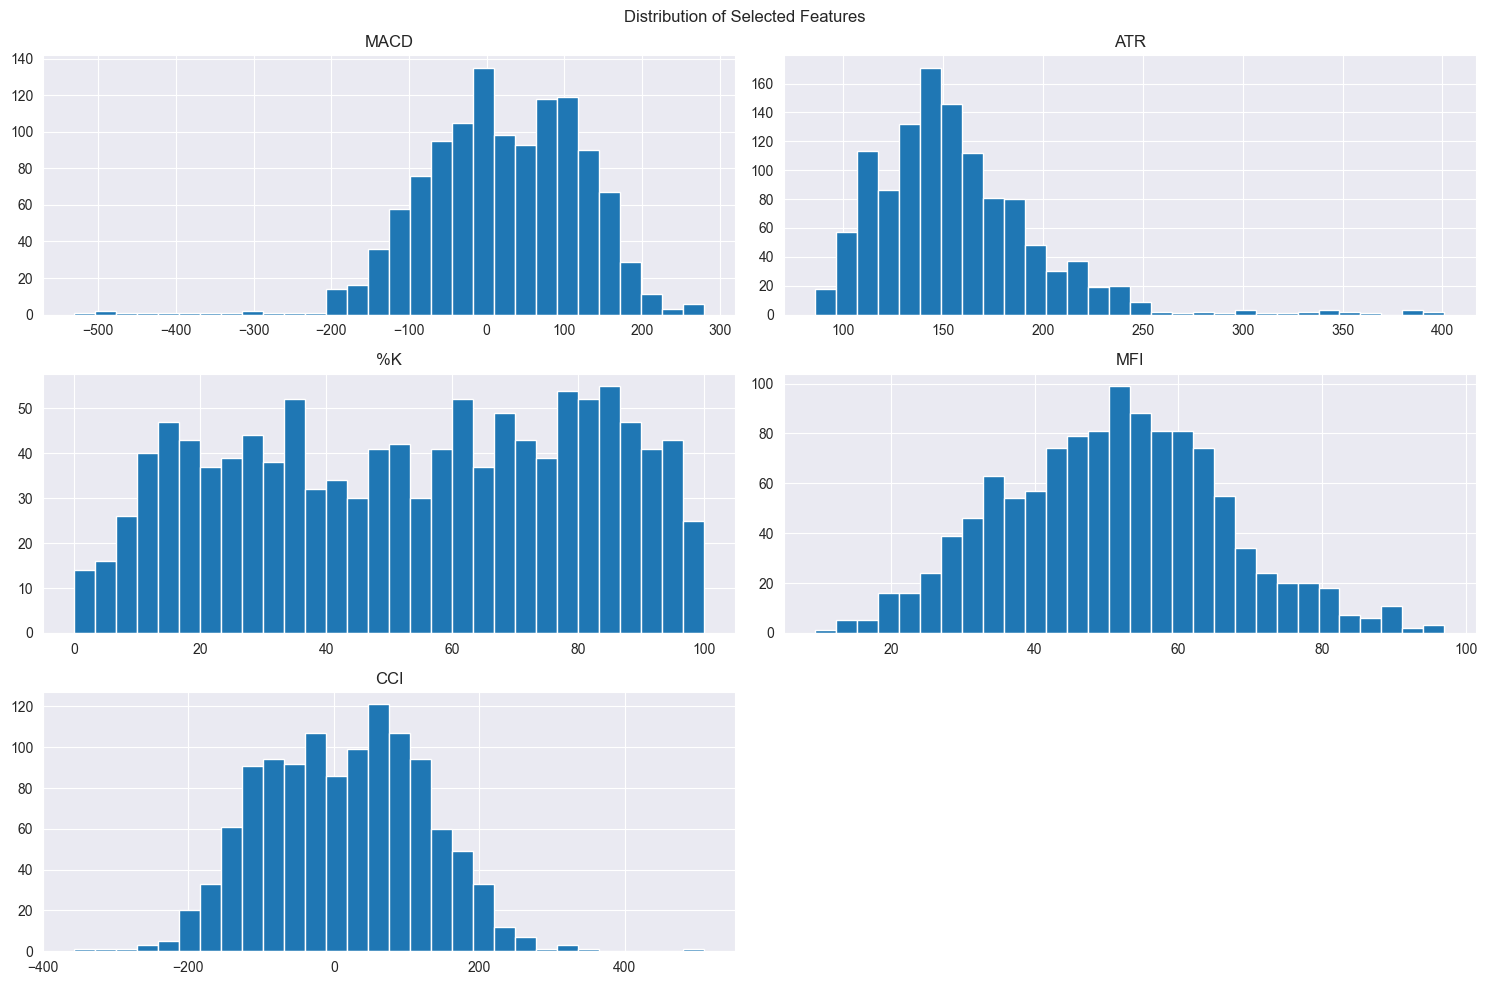

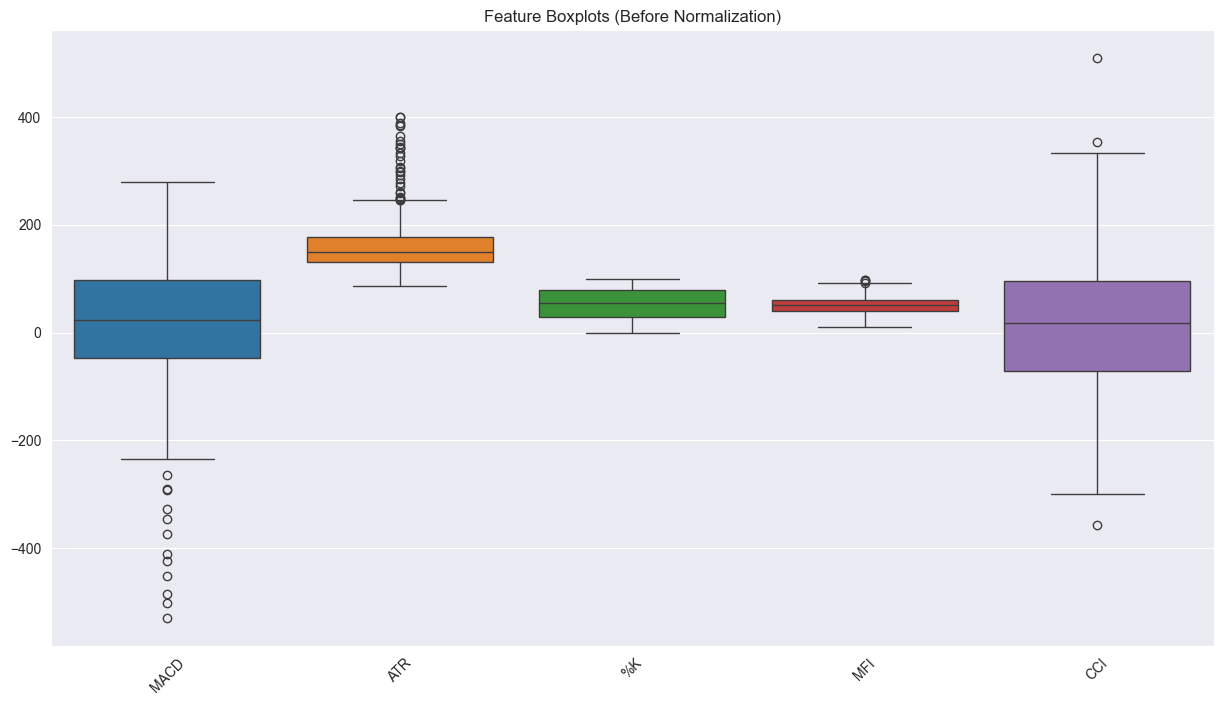

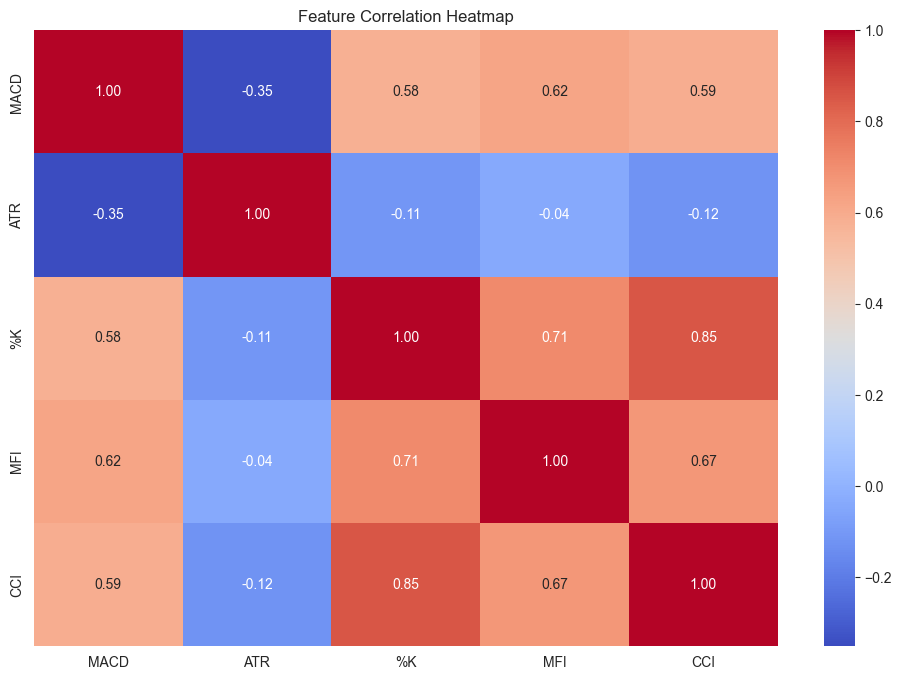

In [294]:
X.hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Selected Features')
plt.tight_layout()
plt.show()

# Boxplot for feature distributions before normalization
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.title('Feature Boxplots (Before Normalization)')
plt.xticks(rotation=45)
plt.show()

# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Prepare the Data for Training and Testing

In [295]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Exclude the 'date' and 'next_day_price_move' columns before normalization
df_features = df[selected_features]
df_normalized = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Add the 'date' column back to the normalized DataFrame
df_normalized.insert(0, 'date', df['date'].values)

# Move 'next_day_price_move' to the last column
df_normalized['next_day_price_move'] = df['next_day_price_move'].values


print(df_normalized.head())

                 date      MACD       ATR        %K       MFI       CCI  \
0 2020-02-06 09:00:00 -0.726876 -0.687030 -0.013840 -0.201819 -0.435783   
1 2020-02-07 09:00:00 -0.639074 -0.776104  0.354491 -0.233348 -0.326895   
2 2020-02-10 09:00:00 -0.545695 -0.723778  0.515647 -0.143154 -0.425480   
3 2020-02-11 09:00:00 -0.472379 -0.869306  0.646153 -0.188848 -0.147469   
4 2020-02-12 09:00:00 -0.396144 -1.004440  0.731166  0.208680  0.020092   

   next_day_price_move  
0                    2  
1                    2  
2                    0  
3                    2  
4                    0  


In [296]:
df_normalized.dtypes # just checking the dtypes

date                   datetime64[ns]
MACD                          float64
ATR                           float64
%K                            float64
MFI                           float64
CCI                           float64
next_day_price_move             int32
dtype: object

In [297]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def create_sliding_window(data, window_size):
    """
    Create sliding window data for time series.

    Parameters:
    - data (np.ndarray): The input data as a NumPy array.
    - window_size (int): The size of the sliding window.

    Returns:
    - X (np.ndarray): The feature windows.
    - y (np.ndarray): The target values.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        # Extract a window of features
        X.append(data[i:i + window_size, :-1])  # All features except the target
        # Extract the target value corresponding to the end of the window
        y.append(data[i + window_size, -1])    # The target is the last column
    return np.array(X), np.array(y)

window_size = 5  # Define the size of the sliding window

# Convert the DataFrame to a NumPy array
data = df_normalized.drop(columns=['date']).values

# Create the sliding window data
X, y = create_sliding_window(data, window_size)

# Split the data into training and testing sets
# split_ratio = 0.9
# split_index = int(len(X) * split_ratio)
train_size = int(len(X) * 0.8)
val_size = int(len(X) * 0.1)

# X_train, X_test = X[:split_index], X[split_index:]
# y_train, y_test = y[:split_index], y[split_index:]
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (942, 5, 5), y_train shape: (942,)
X_test shape: (119, 5, 5), y_test shape: (119,)


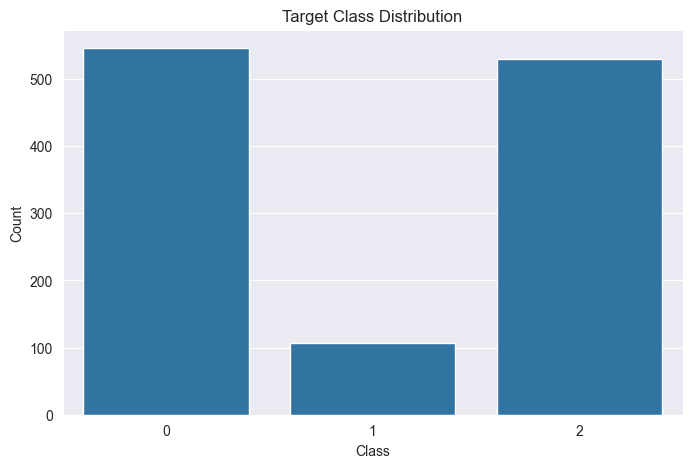

Class Distribution:
next_day_price_move
0    0.461538
2    0.448014
1    0.090448
Name: proportion, dtype: float64


In [298]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x=df_normalized['next_day_price_move'])
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# print the class distribution
class_distribution = df_normalized['next_day_price_move'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

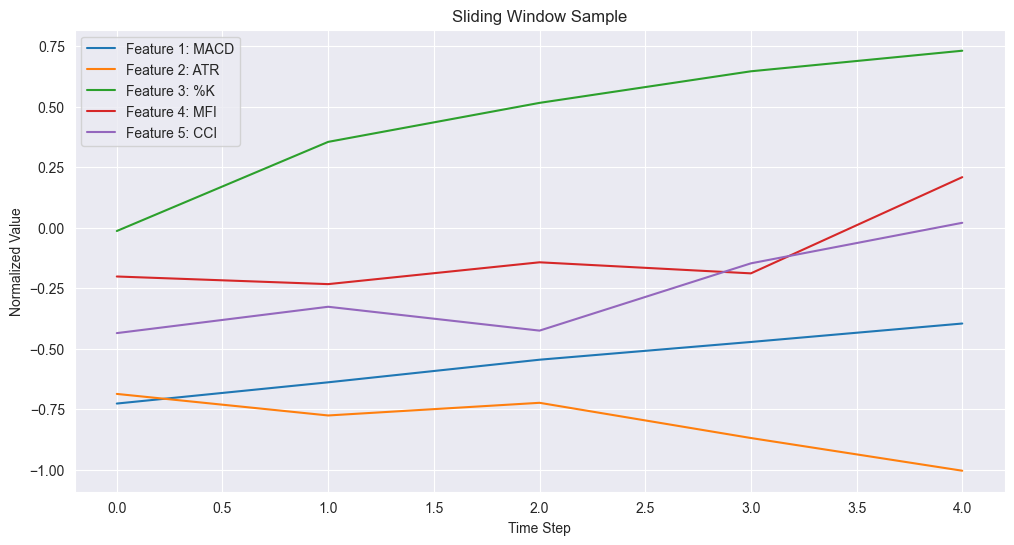

In [299]:
# Visualize a sample sliding window
sample_index = 0  # Change this to visualize different samples
sample_window = X_train[sample_index]

plt.figure(figsize=(12, 6))
for i in range(sample_window.shape[1]):
    plt.plot(sample_window[:, i], label=f'Feature {i+1}: {selected_features[i]}')
plt.title('Sliding Window Sample')
plt.xlabel('Time Step')
plt.ylabel('Normalized Value')
plt.legend()
plt.show()

# Visualize the selected features after normalization

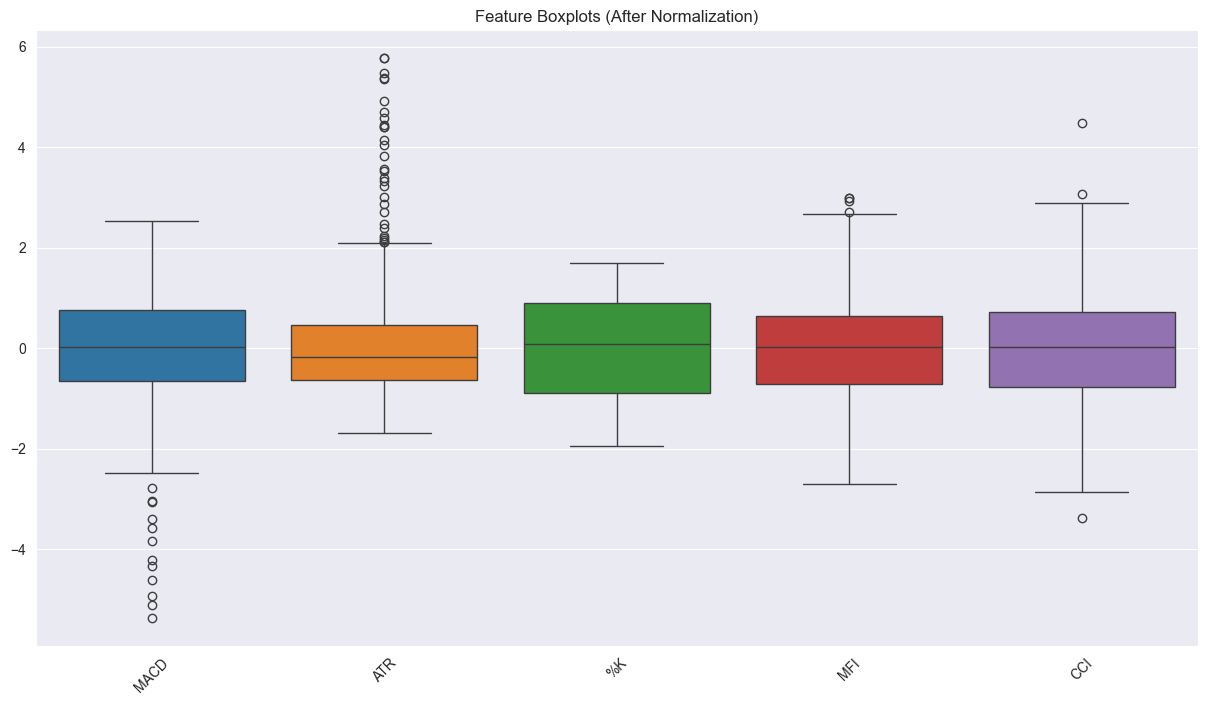

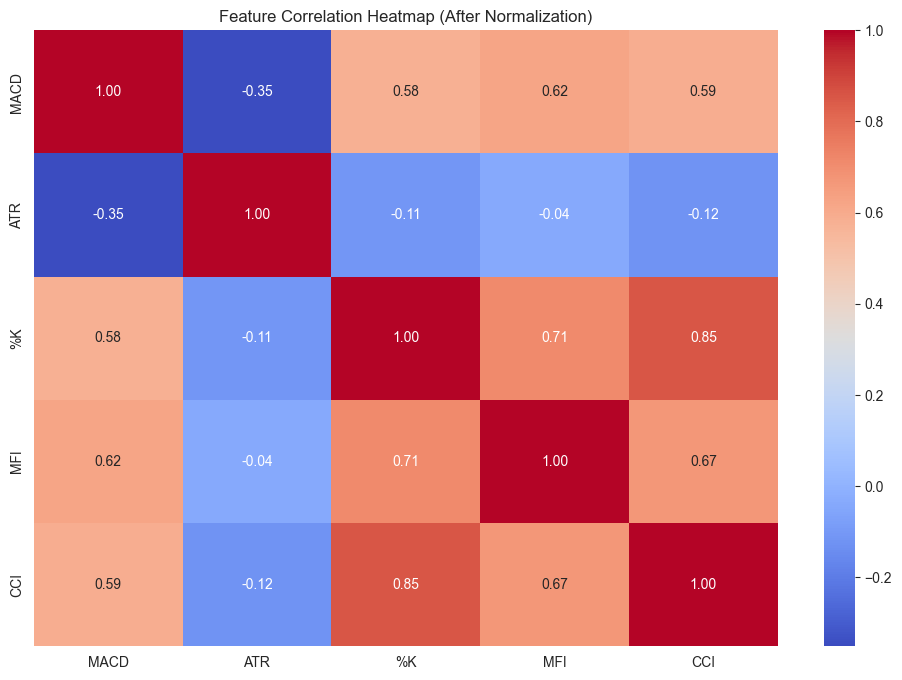

In [300]:
# Boxplot for feature distributions after normalization
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_normalized[selected_features])
plt.title('Feature Boxplots (After Normalization)')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap after normalization
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized[selected_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap (After Normalization)')
plt.show()


# Train and Evaluate the Model with LSTM

In [301]:
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback
import numpy as np
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import f1_score

# Early stop
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Reduce learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

# Save best model
model_checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Add F1 Score callback (as before)
class F1ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super(F1ScoreCallback, self).__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        # Ensure the validation data is set properly
        X_val, y_val = self.validation_data

        # Predict on validation set
        y_pred = self.model.predict(X_val)
        y_true = y_val

        # Calculate predicted classes
        y_pred_classes = tf.argmax(y_pred, axis=1)

        # Calculate and log F1 score
        precision = tf.keras.metrics.Precision()
        recall = tf.keras.metrics.Recall()

        precision.update_state(y_true, y_pred_classes)
        recall.update_state(y_true, y_pred_classes)

        precision_score = precision.result().numpy()
        recall_score = recall.result().numpy()
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score + 1e-7)

        print(f" - val_f1_score: {f1_score:.4f}")

        # Add the F1 score to logs for TensorBoard or other callbacks
        logs['val_f1_score'] = f1_score


f1_callback = F1ScoreCallback(validation_data=(X_val, y_val))


def macro_f1(y_true, y_pred):
    y_pred = K.argmax(y_pred, axis=-1)
    y_true = K.cast(y_true, 'int64')

    # Confusion matrix values
    cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3)
    diag = tf.cast(tf.linalg.diag_part(cm), tf.float32)

    # Cast tf.reduce_sum(cm, axis=0) to float32
    precision = diag / (tf.cast(tf.reduce_sum(cm, axis=0), tf.float32) + K.epsilon())
    recall = diag / (tf.cast(tf.reduce_sum(cm, axis=1), tf.float32) + K.epsilon())  # Also cast here
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return tf.reduce_mean(f1)



def focal_loss_with_class_weights(gamma=2.0, alpha=None):
    def loss(y_true, y_pred):
        y_true = tf.one_hot(tf.cast(tf.squeeze(y_true), tf.int32), depth=3)
        y_pred = tf.clip_by_value(y_pred, 1e-8, 1.0)

        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = tf.pow(1 - y_pred, gamma)

        if alpha is not None:
            alpha_tensor = tf.constant(alpha, dtype=tf.float32)
            alpha_weight = y_true * alpha_tensor
            weight *= alpha_weight

        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=-1))
    return loss

In [360]:
import tensorflow as tf
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Define the LSTM model
model = Sequential()

# Bidirectional LSTM (first layer)
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Middle LSTM Layer
model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Final LSTM Layer
model.add(LSTM(16, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.summary()
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
# alpha = class_weights.tolist()
alpha = [0.4, 1.2, 0.4]
model.compile(optimizer=Adam(),
              loss=focal_loss_with_class_weights(gamma=2.0, alpha=alpha),
              # loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[model_checkpoint, f1_callback]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_206 (LSTM)             (None, 5, 64)             17920     
                                                                 
 batch_normalization_255 (Ba  (None, 5, 64)            256       
 tchNormalization)                                               
                                                                 
 lstm_207 (LSTM)             (None, 5, 32)             12416     
                                                                 
 batch_normalization_256 (Ba  (None, 5, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_260 (Dropout)       (None, 5, 32)             0         
                                                                 
 lstm_208 (LSTM)             (None, 16)              

# Evaluate the model

4/4 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

        Down       0.56      0.68      0.61        56
     neutral       0.00      0.00      0.00        10
          Up       0.60      0.53      0.56        53

    accuracy                           0.55       119
   macro avg       0.38      0.40      0.39       119
weighted avg       0.53      0.55      0.54       119

4/4 [==============================] - 0s 7ms/step


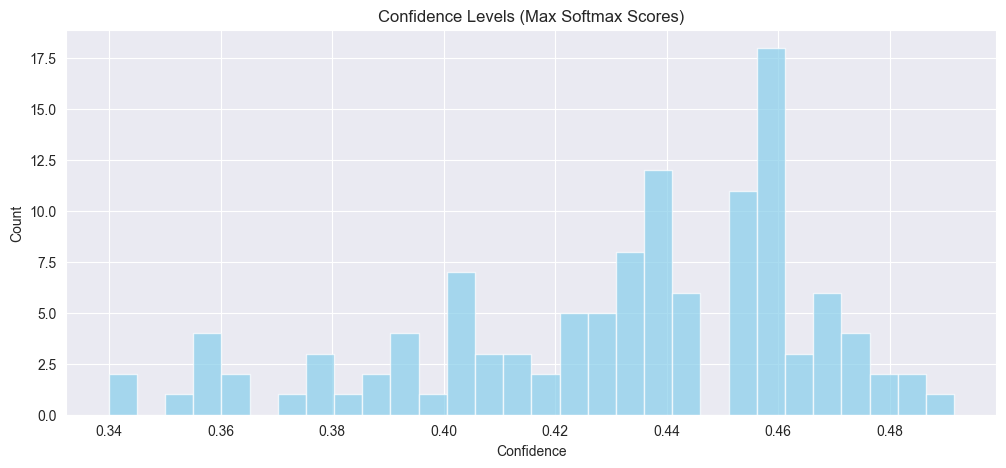

In [361]:
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compare predictions with actual values
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Down', 'neutral', 'Up']))

pred_probs = model.predict(X_test)

# Visualize probability distributions
plt.figure(figsize=(12, 5))
plt.hist(np.max(pred_probs, axis=1), bins=30, alpha=0.7, color='skyblue')
plt.title("Confidence Levels (Max Softmax Scores)")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Plot learning curves

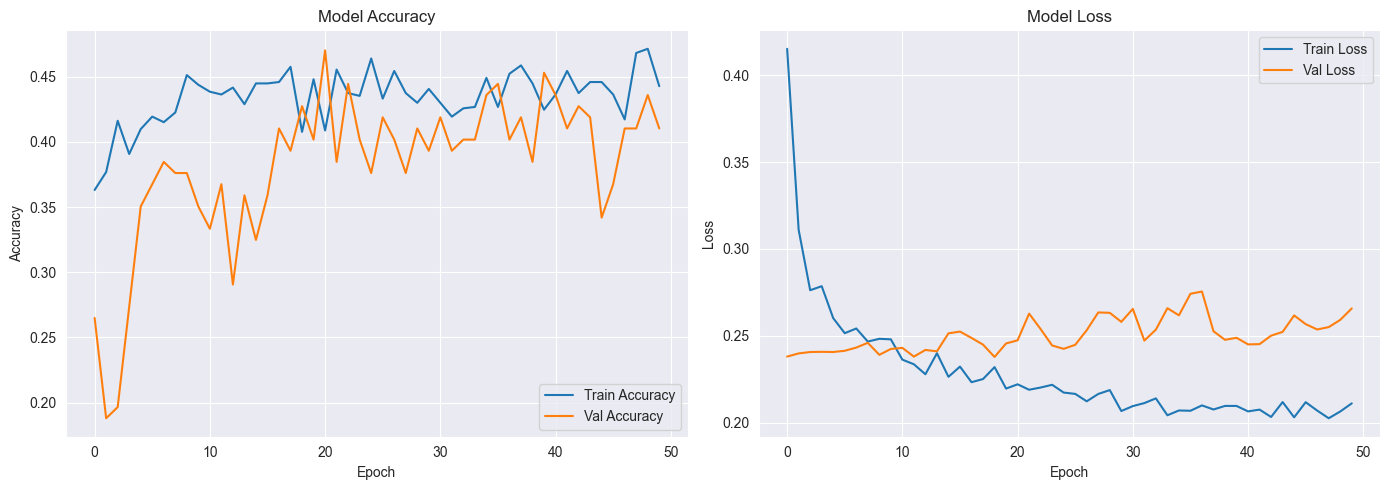

In [362]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

4/4 [==============================] - 0s 7ms/step


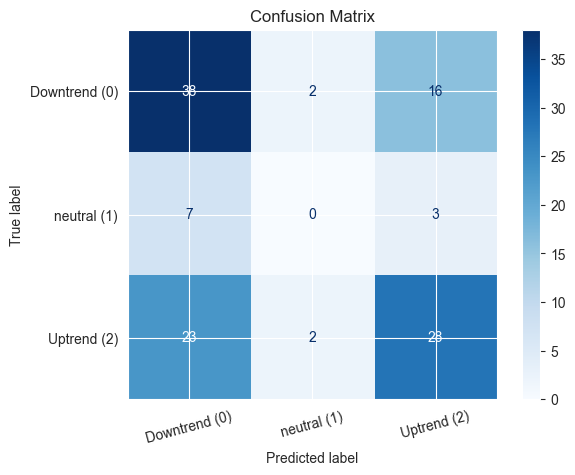

In [363]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Downtrend (0)', 'neutral (1)', 'Uptrend (2)']

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=15)
plt.show()


# ANOTHER TESTING

In [364]:
# def create_sliding_window(data, window_size):
#     X, y = [], []
#     for i in range(len(data) - window_size):
#         X.append(data[i:i + window_size, :-1])  # Include all features except the target
#         y.append(data[i + window_size, -1])  # The target is the last column
#     return np.array(X), np.array(y)
#
# # Ensure normalized data is used
# data = df_normalized.drop(columns=['date']).values
#
# # Test different window sizes
# window_sizes = [5, 10, 20, 50]
# results = {}
#
# for window_size in window_sizes:
#     X, y = create_sliding_window(data, window_size)
#     split_index = int(len(X) * 0.8)
#     X_train, X_temp = X[:split_index], X[split_index:]
#     y_train, y_temp = y[:split_index], y[split_index:]
#
#     # Further split temp set into validation and test sets
#     val_split = int(len(X_temp) * 0.5)
#     X_val, X_test = X_temp[:val_split], X_temp[val_split:]
#     y_val, y_test = y_temp[:val_split], y_temp[val_split:]
#
#     # Train the model
#     model = Sequential()
#     model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#
#     # Middle LSTM Layer
#     model.add(LSTM(64, return_sequences=True))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.3))
#
#     # Final LSTM Layer
#     model.add(LSTM(32))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#
#     # Dense layer
#     model.add(Dense(32, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.2))
#
#     # Output layer
#     model.add(Dense(3, activation='softmax'))
#     class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
#     alpha = class_weights.tolist()
#     # alpha = [0.4, 1.0, 0.4]
#     model.compile(optimizer=Adam(),
#                   loss=focal_loss_with_class_weights(gamma=2.0, alpha=alpha),
#                   # loss="sparse_categorical_crossentropy",
#                   metrics=["accuracy"])
#     history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0, callbacks=[reduce_lr])
#
#     # Evaluate the model
#     loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
#     results[window_size] = accuracy
#
# # Print results
# print("Window Size vs Accuracy:", results)

In [365]:
# import tensorflow as tf
# print(tf.config.list_physical_devices('GPU'))

# Save model & testing

In [368]:
from keras.models import load_model
model.save('stock_trend_predictor.keras')
model = load_model("keras_models/stock_trend_predictor.keras", custom_objects={'loss': focal_loss_with_class_weights(gamma=2.0, alpha=alpha)})

def predict_stock_trend(stock_code: str, date: str):
    # Convert date
    end_ts = convert_to_unix_timestamp(date)
    start_ts = convert_to_unix_timestamp("2020-01-01")  # or go 100 days back

    # Fetch data
    stock_url = f"https://query2.finance.yahoo.com/v8/finance/chart/{stock_code}?period1={start_ts}&period2={end_ts}&interval=1d"
    headers = {
        "Content-Type": "application/json",
        "User-Agent": "Mozilla/5.0"
    }
    r = requests.get(stock_url, headers=headers)
    stock_data = StockResponse.from_json(r.json()).stock_data

    # for testing only, print the last date that got from the api
    print('Last date:')
    print(stock_data[-1].date)

    df = StockResponse(stock_data).to_dataframe()

    # Compute indicators
    df = compute_and_add_indicators(stock_data, df)

    # Drop non-feature columns
    feature_df = df.drop(columns=["date", "next_day_price_move"], errors="ignore")

    # Only use feature that saved on "selected_features.txt"
    selected_features = []
    with open("selected_features.txt", "r") as f:
        for line in f:
            selected_features.append(line.strip())
    feature_df = feature_df[selected_features]

    # Get last window (e.g., last 60 days)
    window_size = X_train.shape[1]  # reuse your training window size
    if len(feature_df) < window_size:
        print("Not enough data to predict")
        return

    x_input = feature_df[-window_size:].values
    x_input = x_input.reshape((1, x_input.shape[0], x_input.shape[1]))

    # Ensure x_input does not contain decimal.Decimal objects by converting them to float
    if isinstance(x_input, np.ndarray):
        x_input = x_input.astype(float)  # Convert the entire NumPy array to float
    else:
        # For iterables other than NumPy arrays
        x_input = np.array([float(value) for value in x_input])


    # Load model
    # model = load_model("stock_trend_predictor.h5", custom_objects={'focal_loss': focal_loss})

    # Predict
    pred = model.predict(x_input)
    predicted_class = np.argmax(pred)

    label_map = {0: "Downtrend", 1: "neutral", 2: "Uptrend"}
    print(f"Prediction for {stock_code} on {date}: {label_map[predicted_class]}")
    return predicted_class

In [369]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import requests
import random

# === MAIN LOOP ===
total_tests = 50  # Change this to 50 if you want
correct = 0

for i in range(total_tests):
    stock_code = random.choice(["BMRI.JK", "BBNI.JK"])
    today = datetime.now()
    end_date = today - timedelta(days=2)
    start_date = end_date - timedelta(days=1000)

    url = f"https://query2.finance.yahoo.com/v8/finance/chart/{stock_code}?" \
          f"period1={int(start_date.timestamp())}&period2={int(end_date.timestamp())}&interval=1d"
    headers = {
        "Content-Type": "application/json",
        "User-Agent": "Mozilla/5.0"
    }

    r = requests.get(url, headers=headers)
    stock_data = StockResponse.from_json(r.json())
    df = stock_data.to_dataframe().dropna().reset_index(drop=True)

    if len(df) < 62:
        continue  # Not enough data to predict

    random_index = random.randint(60, len(df) - 2)
    last_date = df.loc[random_index - 1, "date"]
    actual_date = df.loc[random_index, "date"]
    close_last_date = df.loc[random_index - 1, "close"]
    close_actual = df.loc[random_index, "close"]
    price_change = close_actual - close_last_date

    if price_change > 0.5:
        actual_class = 2  # Uptrend
    elif price_change < -0.5:
        actual_class = 0  # Downtrend
    else:
        actual_class = 1  # neutral

    # Predict using your model
    predicted_class = predict_stock_trend(stock_code, actual_date.strftime("%Y-%m-%d"))

    label_map = {0: "Downtrend", 1: "neutral", 2: "Uptrend"}
    print(f"Test #{i+1}")
    print(f"Stock Code       : {stock_code}")
    print(f"Last Known Date  : {last_date.strftime('%Y-%m-%d')}")
    print(f"Prediction Date  : {actual_date.strftime('%Y-%m-%d')}")
    print(f"Close Last Date  : {close_last_date:.2f}")
    print(f"Close Actual     : {close_actual:.2f}")
    print(f"Actual Movement  : {label_map[actual_class]}")
    print(f"Predicted        : {label_map[predicted_class]}")
    print(f"{'✅ Correct' if predicted_class == actual_class else '❌ Incorrect'}")
    print("-" * 50)

    if predicted_class == actual_class:
        correct += 1

print(f"\n✅ Prediction Accuracy over {total_tests} tests: {correct / total_tests:.2%}")


Last date:
2024-05-02 09:00:00
1/1 [==============================] - 1s 714ms/step
Prediction for BBNI.JK on 2024-05-03: Uptrend
Test #1
Stock Code       : BBNI.JK
Last Known Date  : 2024-05-02
Prediction Date  : 2024-05-03
Close Last Date  : 4830.00
Close Actual     : 4830.00
Actual Movement  : neutral
Predicted        : Uptrend
❌ Incorrect
--------------------------------------------------
Last date:
2022-12-29 09:00:00
1/1 [==============================] - 0s 19ms/step
Prediction for BMRI.JK on 2022-12-30: Uptrend
Test #2
Stock Code       : BMRI.JK
Last Known Date  : 2022-12-29
Prediction Date  : 2022-12-30
Close Last Date  : 4987.50
Close Actual     : 4962.50
Actual Movement  : Downtrend
Predicted        : Uptrend
❌ Incorrect
--------------------------------------------------
Last date:
2024-12-23 09:00:00
1/1 [==============================] - 0s 19ms/step
Prediction for BBNI.JK on 2024-12-24: Uptrend
Test #3
Stock Code       : BBNI.JK
Last Known Date  : 2024-12-23
Prediction Da